In [45]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.formula.api as sm
from linearmodels import PanelOLS

# Question 1

#### Read the Disagreement data. After reading the data in and checking for obvious data errors, do your best to describe and get to know the data. What do you observe?

In [46]:
# Reading Disagreement Data
dis = pd.read_table('data\CooksonNiessner2020_Disagree.txt', parse_dates=['date'], index_col='date')
dis

,permno,dis_all,dis_within_group,dis_across_group
date,,,,
2010-11-05,66181,1.000000,0.0,0.0
2010-12-02,79667,0.000000,0.0,0.0
2010-11-29,89139,0.000000,0.0,0.0
2010-11-19,89139,1.000000,0.0,0.0
2010-02-02,11081,0.000000,0.0,0.0
...,...,...,...,...
2018-10-13,90291,0.000000,0.0,0.0
2018-09-14,90266,0.903508,0.0,0.0
2018-10-15,90291,1.000000,0.0,0.0


In [47]:
# Data type of columns are correct
dis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2651379 entries, 2010-11-05 to 2018-04-16
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   permno            int64  
 1   dis_all           float64
 2   dis_within_group  float64
 3   dis_across_group  float64
dtypes: float64(3), int64(1)
memory usage: 101.1 MB


In [48]:
# Characteristics of variables
dis.describe()

,permno,dis_all,dis_within_group,dis_across_group
count,2.651379e+06,2.651379e+06,2.651379e+06,2.651379e+06
mean,7.274101e+04,2.530501e-01,1.483946e-02,1.172989e-02
std,2.537136e+04,4.103691e-01,9.884302e-02,8.138073e-02
min,1.000100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.609300e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.434200e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.023100e+04,7.453560e-01,0.000000e+00,0.000000e+00
max,9.343100e+04,1.000000e+00,1.000000e+00,1.117903e+00


In [49]:
# There is no missing value
dis.isnull().any()

permno              False
dis_all             False
dis_within_group    False
dis_across_group    False
dtype: bool

In [50]:
dis.dis_all[(dis.dis_all == 0) | (dis.dis_all == 1)].count()
# There is some values other than 0 or 1

2115465

In [51]:
dis.dis_all.nunique()

8816

#### Read the CRSP data. After reading the data in and checking for obvious data errors, make a plot of the cumulative returns (buy-and-hold returns) of Tesla, Coca-Cola, and Apple (one figure for both stocks) and comment what you see.

In [52]:
# Reading CRSP Data
crsp = pd.read_table('data\CRSP.csv.gz', sep=',', parse_dates=['date'], index_col='date')
crsp

C:\Users\user66\anaconda3\envs\hecfin\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PERMNO,TICKER,PRC,VOL,RET,SHROUT
date,,,,,,
2017-01-03,10001,EGAS,12.60000,70124.0,0.003984,10520.0
2017-01-04,10001,EGAS,12.55000,4013.0,-0.003968,10520.0
2017-01-05,10001,EGAS,12.70000,97588.0,0.011952,10520.0
2017-01-06,10001,EGAS,12.70000,164633.0,0.000000,10520.0
2017-01-09,10001,EGAS,12.60000,27508.0,-0.007874,10520.0
...,...,...,...,...,...,...
2018-12-24,93436,TSLA,295.39001,5559913.0,-0.076242,171733.0
2018-12-26,93436,TSLA,326.09000,8163143.0,0.103930,171733.0
2018-12-27,93436,TSLA,316.13000,8575133.0,-0.030544,171733.0


In [53]:
# Data type of columns are correct, except 'TICKER' & 'RET'
crsp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3687719 entries, 2017-01-03 to 2018-12-31
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PERMNO  int64  
 1   TICKER  object 
 2   PRC     float64
 3   VOL     float64
 4   RET     object 
 5   SHROUT  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 196.9+ MB


In [107]:
crsp.describe()

,permno,prc,vol,ret,shrout,1+ret,cret
count,3.672167e+06,3.672167e+06,3.672167e+06,3.672167e+06,3.672167e+06,3.672167e+06,3.672167e+06
mean,5.126498e+04,7.527204e+01,9.169543e+05,1.134781e-04,9.967823e+04,1.000113e+00,1.217295e+01
std,3.503817e+04,3.338511e+03,3.885561e+06,3.306049e-02,3.459066e+05,3.306049e-02,5.047020e+01
min,1.000100e+04,-7.094300e+02,0.000000e+00,-9.652480e-01,2.400000e+01,3.475200e-02,-9.999982e+01
25%,1.528500e+04,9.450000e+00,1.809750e+04,-7.859000e-03,7.691000e+03,9.921410e-01,-4.736860e+00
50%,5.307400e+04,2.288000e+01,1.211790e+05,0.000000e+00,2.720500e+04,1.000000e+00,6.092636e+00
75%,8.880700e+04,4.496000e+01,5.668220e+05,7.758000e-03,7.365600e+04,1.007758e+00,2.206216e+01
max,9.343600e+04,3.356300e+05,6.702928e+08,8.977274e+00,1.055000e+07,9.977274e+00,4.542895e+03


### **`Answer:`**
The minimmun of prc (price) is negative, it seems that there is an error.

In [54]:
# Making columns name lower case to work easier
crsp.columns = [x.lower() for x in crsp.columns]
crsp

,permno,ticker,prc,vol,ret,shrout
date,,,,,,
2017-01-03,10001,EGAS,12.60000,70124.0,0.003984,10520.0
2017-01-04,10001,EGAS,12.55000,4013.0,-0.003968,10520.0
2017-01-05,10001,EGAS,12.70000,97588.0,0.011952,10520.0
2017-01-06,10001,EGAS,12.70000,164633.0,0.000000,10520.0
2017-01-09,10001,EGAS,12.60000,27508.0,-0.007874,10520.0
...,...,...,...,...,...,...
2018-12-24,93436,TSLA,295.39001,5559913.0,-0.076242,171733.0
2018-12-26,93436,TSLA,326.09000,8163143.0,0.103930,171733.0
2018-12-27,93436,TSLA,316.13000,8575133.0,-0.030544,171733.0


In [55]:
# Finding values other than number in RET column
crsp.ret[pd.isnull(pd.to_numeric(crsp.ret, errors='coerce'))].unique()

array([nan, 'B', 'C'], dtype=object)

In [56]:
# Converting values to number and removing non-number values
crsp.ret = pd.to_numeric(crsp.ret, errors='coerce')

In [57]:
# Checking if there is missing values in 'ticker' column
pd.isnull(crsp.ticker).any()

True

In [58]:
# Removing rows which contain missing values
crsp = crsp.dropna()

In [59]:
crsp.loc[:,'1+ret'] = (crsp.ret + 1)
crsp.loc[:,'cret'] = (crsp.groupby(['ticker'])['1+ret'].cumprod() - 1) * 100
crsp

C:\Users\user66\anaconda3\envs\hecfin\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,permno,ticker,prc,vol,ret,shrout,1+ret,cret
date,,,,,,,,
2017-01-03,10001,EGAS,12.60000,70124.0,0.003984,10520.0,1.003984,0.398400
2017-01-04,10001,EGAS,12.55000,4013.0,-0.003968,10520.0,0.996032,0.000019
2017-01-05,10001,EGAS,12.70000,97588.0,0.011952,10520.0,1.011952,1.195219
2017-01-06,10001,EGAS,12.70000,164633.0,0.000000,10520.0,1.000000,1.195219
2017-01-09,10001,EGAS,12.60000,27508.0,-0.007874,10520.0,0.992126,0.398408
...,...,...,...,...,...,...,...,...
2018-12-24,93436,TSLA,295.39001,5559913.0,-0.076242,171733.0,0.923758,38.233122
2018-12-26,93436,TSLA,326.09000,8163143.0,0.103930,171733.0,1.103930,52.599691
2018-12-27,93436,TSLA,316.13000,8575133.0,-0.030544,171733.0,0.969456,47.938686


In [60]:
# indexing for each firms
tesla = (crsp.ticker == 'TSLA')
coca = (crsp.ticker == 'KO')
apple = (crsp.ticker == 'AAPL')

Text(0, 0.5, 'Cumulative returns (%)')

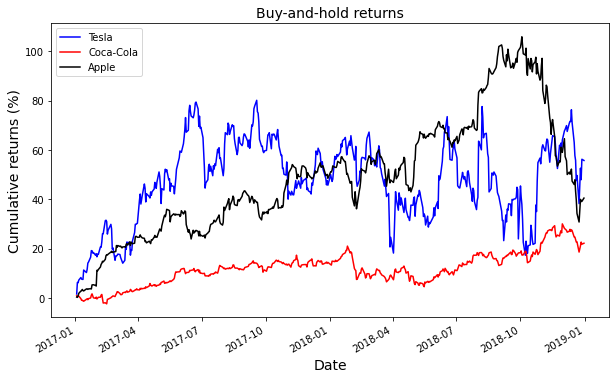

In [61]:
# Ploting cumulative returns
ax = crsp.cret[tesla].plot(figsize=(10,6), color='blue')
crsp.cret[coca].plot(figsize=(10,6), color='red')
crsp.cret[apple].plot(figsize=(10,6), color='black')
ax.legend(['Tesla','Coca-Cola','Apple'])
ax.set_title('Buy-and-hold returns' , fontsize = 14)
ax.set_xlabel('Date' , fontsize = 14)
ax.set_ylabel('Cumulative returns (%)' , fontsize = 14)

#### Also make a plot of the daily volume of each stock (one figure for all stocks) and comment what you see.

### Daily volume

Text(0, 0.5, 'Volume ($)')

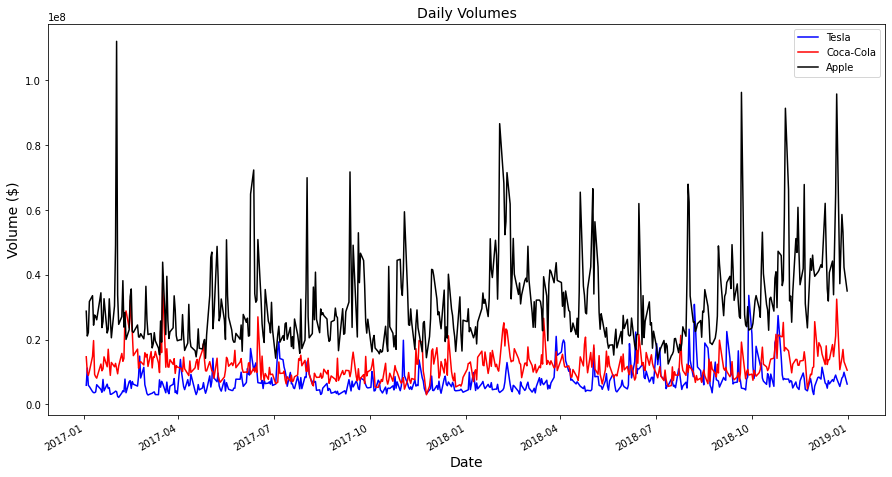

In [62]:
# Ploting daily volumes
ax2 = crsp.vol[tesla].plot(figsize=(15,8), color='blue')
crsp.vol[coca].plot(figsize=(15,8), color='red')
crsp.vol[apple].plot(figsize=(15,8), color='black')
#ax2.set_yscale('log')
ax2.legend(['Tesla','Coca-Cola','Apple'])
ax2.set_title('Daily Volumes' , fontsize = 14)
ax2.set_xlabel('Date' , fontsize = 14)
ax2.set_ylabel('Volume ($)' , fontsize = 14)

Text(0.5, 1.0, 'Apple')

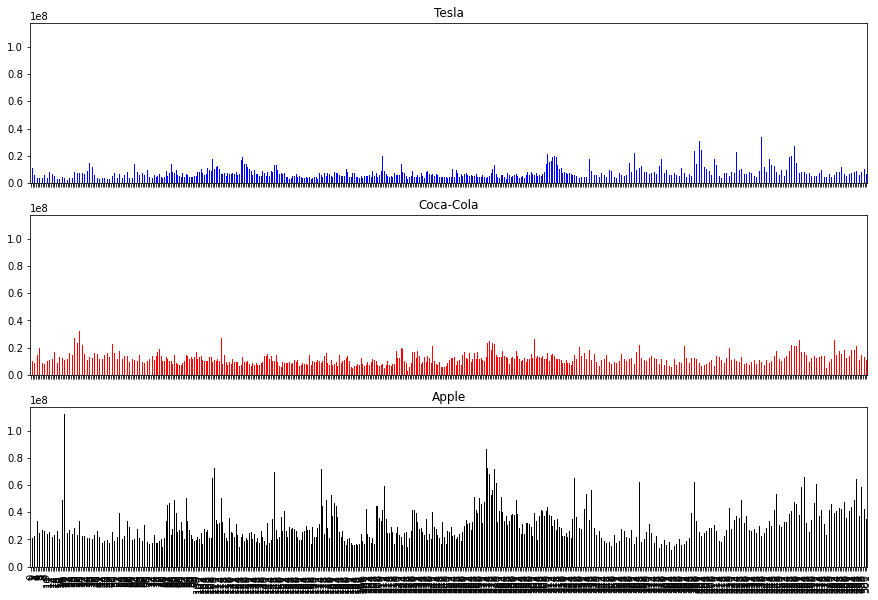

In [63]:
fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
crsp.vol[tesla].plot.bar(figsize=(15,10), color='blue', use_index=False, ax=axs[0])
axs[0].set_title('Tesla')
crsp.vol[coca].plot.bar(figsize=(15,10), color='red', use_index=False, ax=axs[1])
axs[1].set_title('Coca-Cola')
crsp.vol[apple].plot.bar(figsize=(15,10), color='black', use_index=False, ax=axs[2])
axs[2].set_title('Apple')

### Monthly volume

In [64]:
crsp1 = crsp.groupby('ticker').resample('M').sum()

Text(0.5, 1.0, 'Apple')

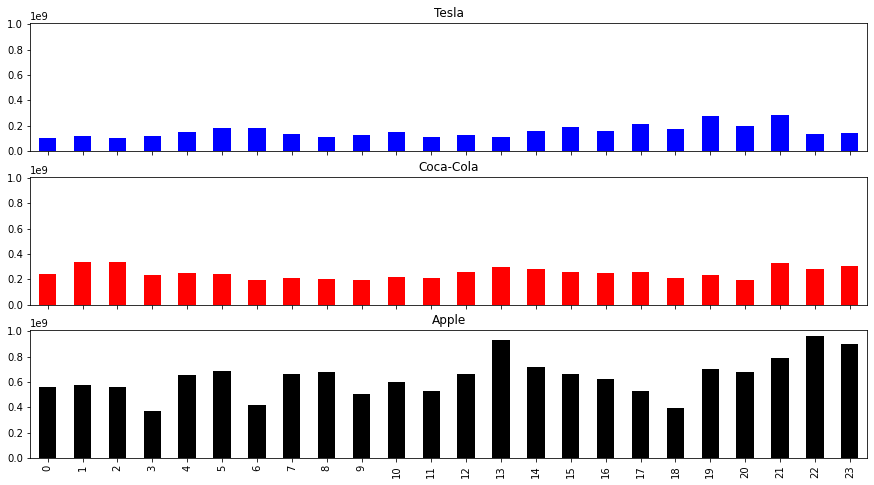

In [65]:
fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
crsp1.loc['TSLA'].vol.plot.bar(figsize=(15,8), color='blue', use_index=False, ax=axs[0])
axs[0].set_title('Tesla')
crsp1.loc['KO'].vol.plot.bar(figsize=(15,8), color='red', use_index=False, ax=axs[1])
axs[1].set_title('Coca-Cola')
crsp1.loc['AAPL'].vol.plot.bar(figsize=(15,8), color='black', use_index=False, ax=axs[2])
axs[2].set_title('Apple')

# Question 2 
#### Are the returns of Tesla, Coca-Cola, and Apple normally distributed? First use an appropriate plot, and then use at least one statistical test. Comment your results.
## Tesla

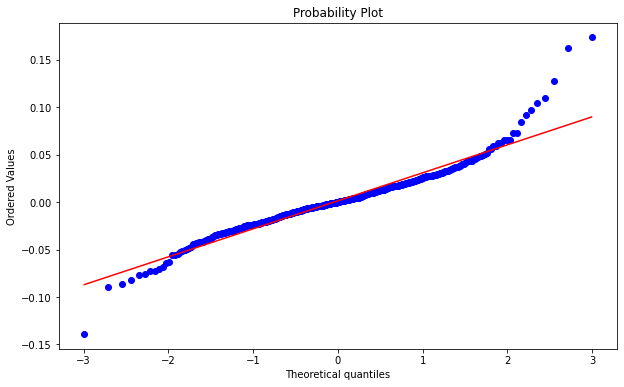

In [66]:
# ploting by using probplot to check normality
plt.figure(figsize=(10,6))
sp.stats.probplot(crsp.ret[tesla],plot=plt)
plt.show()

Text(0.5, 1.0, 'Tesla return frequency')

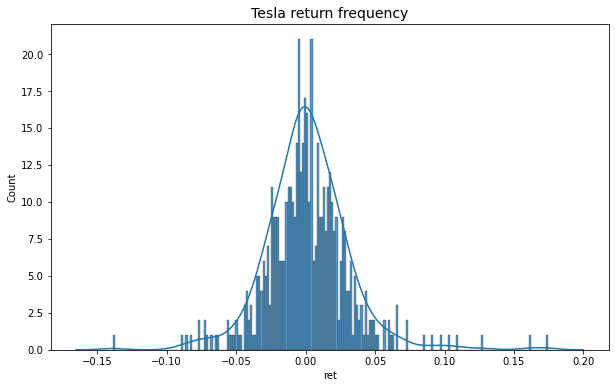

In [67]:
# ploting data histogram to comparison with normal probability density function
fig, axs = plt.subplots(figsize=(10,6))
sns.histplot(crsp.ret[tesla], binwidth=0.0015, ax=axs)
sns.kdeplot(crsp.ret[tesla], ax=axs)
axs.set_title('Tesla return frequency', fontsize = 14)

In [68]:
# Performing statistical tests to test normality
sp.stats.kstest(crsp.ret[tesla], cdf = 'norm')[1],sp.stats.normaltest(crsp.ret[tesla])[1],\
    sp.stats.jarque_bera(crsp.ret[tesla])[1], sp.stats.shapiro(crsp.ret[tesla])[1]

(8.562291746231027e-99, 1.0489577759993148e-21, 0.0, 8.530859802206511e-14)

**`Answer:`** Null hypothesis $(H_{0})$ in these tests are normality.
P-values for these tests are very low, so we can reject the $H_{0}$ (normality)\
Also, the outliers at the tails of distribution don't follow normal distribution and make the returns distribution different from normal one.

## Coca-Cola

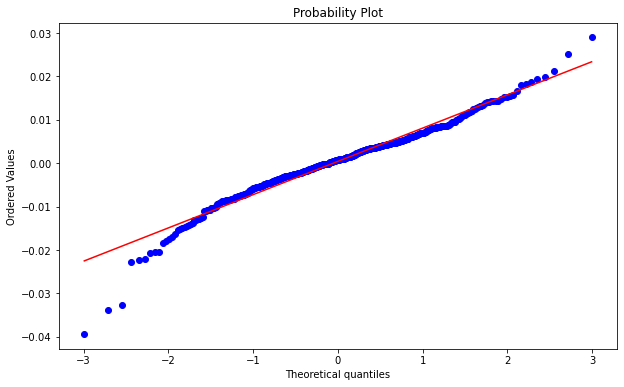

In [69]:
# ploting by using probplot to check normality
plt.figure(figsize=(10,6))
sp.stats.probplot(crsp.ret[coca],plot=plt)
plt.show()

Text(0.5, 1.0, 'Coca-Cola return frequency')

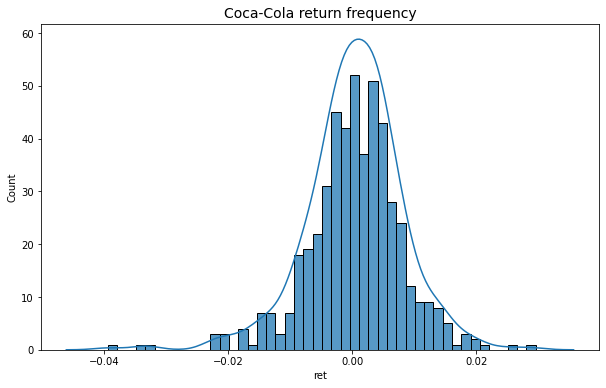

In [70]:
# ploting data histogram to comparison with normal probability density function
fig, axs = plt.subplots(figsize=(10,6))
sns.histplot(crsp.ret[coca], binwidth=0.0015, ax=axs)
sns.kdeplot(crsp.ret[coca], ax=axs)
axs.set_title('Coca-Cola return frequency', fontsize = 14)

In [71]:
# Performing statistical tests to test normality
sp.stats.kstest(crsp.ret[coca], cdf = 'norm')[1],sp.stats.normaltest(crsp.ret[coca])[1],\
    sp.stats.jarque_bera(crsp.ret[coca])[1], sp.stats.shapiro(crsp.ret[coca])[1]

(6.546556605338113e-111, 5.227340490785802e-15, 0.0, 6.989638312582258e-10)

**`Answer:`** Null hypothesis $(H_{0})$ in these tests are normality.
P-values for these tests are very low, so we can reject the $H_{0}$ (normality) \
Also, the outliers at the tails of distribution don't follow normal distribution and make the returns distribution different from normal one.

# Apple

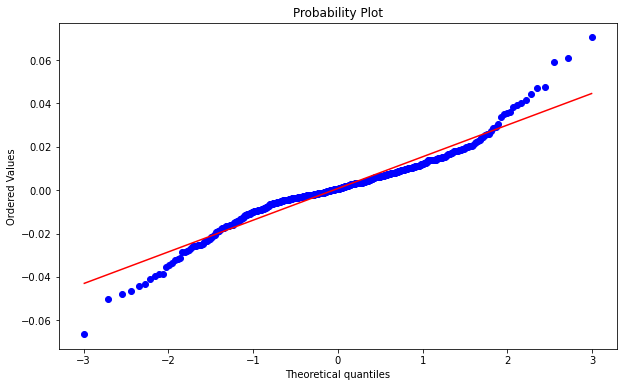

In [72]:
# ploting by using probplot to check normality
plt.figure(figsize=(10,6))
sp.stats.probplot(crsp.ret[apple],plot=plt)
plt.show()

Text(0.5, 1.0, 'Apple return frequency')

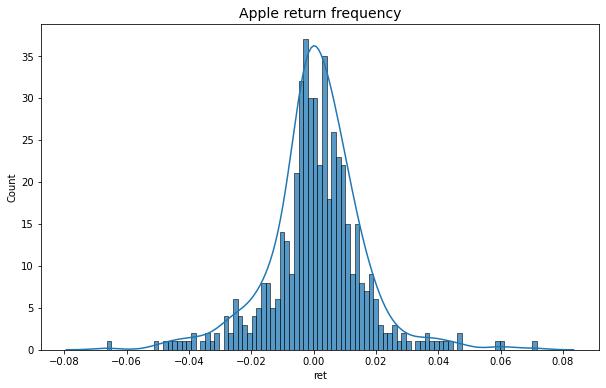

In [73]:
# ploting data histogram to comparison with normal probability density function
fig, axs = plt.subplots(figsize=(10,6))
sns.histplot(crsp.ret[apple], binwidth=0.0015, ax=axs)
sns.kdeplot(crsp.ret[apple], ax=axs)
axs.set_title('Apple return frequency', fontsize = 14)

In [74]:
# Performing statistical tests to test normality
sp.stats.kstest(crsp.ret[apple], cdf = 'norm')[1],sp.stats.normaltest(crsp.ret[apple])[1],\
    sp.stats.jarque_bera(crsp.ret[apple])[1], sp.stats.shapiro(crsp.ret[apple])[1]

(6.581742597256982e-106, 1.9480123338549199e-10, 0.0, 6.103441862158332e-13)

**`Answer:`** Null hypothesis $(H_{0})$ in these tests are normality.
P-values for these tests are very low, so we can reject the $H_{0}$ (normality) \
Also, the outliers at the tails of distribution don't follow normal distribution and make the returns distribution different from normal one.

# Question 3

### First part
Are mean returns in any of the stocks (Tesla, Coca-Cola, and Apple) significantly different? (ie.
$H_0$: $\mu_{TSLA} - \mu_{AAPL} = 0$ and $\mu_{TSLA} - \mu_{KO} = 0$ and $\mu_{AAPL} - \mu_{KO} = 0$)

# **`Answer:`** 
To check $H_0$: ($\mu_{TSLA} - \mu_{AAPL} = 0$ and $\mu_{TSLA} - \mu_{KO} = 0$ and $\mu_{AAPL} - \mu_{KO} = 0$), first we check three seprate $H_{0}$ (ie. $H_0$: $\mu_{TSLA} - \mu_{AAPL} = 0$ and $H_0$: $\mu_{TSLA} - \mu_{KO} = 0$  $H_0$: $\mu_{AAPL} - \mu_{KO}= 0$) and then we use Bonferroni correction to test joint hypothesis. (main $H_0$)

If we choose significance level of $\alpha = 5%$ for joint hypothesis, then we should to cosider $\alpha = 5 / 3 = 1.67$% for each seprate test

for checking each three seprate $H_0$ we can follow two approachs

## **First approch**

We get three subsets of data, each one contains only two stocks and create a dummy for Apple and a dummy for Tesla \
Then by using each data subset we run ols regression and regress return on dummy, the estimation of coefficient of dummy is difference in mean returns of two stock.

For example to evaluating if $H_0$: $\mu_{AAPL} - \mu_{TSLA} = 0$ we get a subset of data that includes only Tela and Apple\
Then by using this subset of date we run the following regression

$ret$ = $\alpha + \beta \times D_{Tesla} + \epsilon$ 

So $\alpha$ is equivalent of $\mu_{AAPL}$ and\
$\beta$ is equaivalent of $(\mu_{TSLA} - \mu_{AAPL})$\
Then we can use p-value from regression result to check if it is significantly different from zero.

Since we use two firms returns in regression, so the variance of errors are different for each firm, so we use heteroscedasticity robust (HC1) in regression.

Based on efficient market theorem, it's not possible to predict return using the previous returns, so there is no seial corrolation in returns, so there is no need to use HCA covariance correction in regression.

In [75]:
crsp3 = crsp.copy()
crsp3['t_d'] = 0
crsp3['a_d'] = 0
crsp3.loc[crsp3['ticker'] == 'TSLA', ['t_d']] = 1
crsp3.loc[crsp3['ticker'] == 'AAPL', ['a_d']] = 1
tesla_apple_df = crsp3[(tesla) | (apple)]
tesla_coca_df = crsp3[(tesla) | (coca)]
apple_coca_df = crsp3[(apple) | (coca)]

### First regression
$ret$ = $\alpha + \beta \times D_{Tesla} + \epsilon$ 

In [76]:
ols = sm.ols(formula='ret ~ t_d', data=tesla_apple_df).fit(cov_type='HC1', use_t=True)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1319
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.717
Time:                        16:45:11   Log-Likelihood:                 2320.8
No. Observations:                1004   AIC:                            -4638.
Df Residuals:                    1002   BIC:                            -4628.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.001      1.178      0.239      -0.001       0.002
t_d            0.0006      0.002      0.363      0.717      -0.002       0.004
==============================================================================
Omnibus:                      229.741   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2722.502
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                      10.949   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

From OLS results we find that p-value of the coefficient of dummy is 0.717, so we can not reject \
$H_0$: $\mu_{TSLA} - \mu_{AAPL} = 0$

### Second regression
$ret$ = $\alpha + \beta \times D_{Tesla} + \epsilon$ 

In [77]:
ols = sm.ols(formula='ret ~ t_d', data=tesla_coca_df).fit(cov_type='HC1', use_t=True)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4219
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.516
Time:                        16:45:12   Log-Likelihood:                 2398.4
No. Observations:                1004   AIC:                            -4793.
Df Residuals:                    1002   BIC:                            -4783.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.233      0.218      -0.000       0.001
t_d            0.0009      0.001      0.650      0.516      -0.002       0.004
==============================================================================
Omnibus:                      295.089   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5459.185
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                      14.295   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

From OLS results we find that p-value of the coefficient of dummy is 0.65, so we can not reject\
$H_0$: $\mu_{TSLA} - \mu_{KO} = 0$

### Third regression
$ret$ = $\alpha + \beta \times D_{Apple} + \epsilon$ 

In [78]:
ols = sm.ols(formula='ret ~ a_d', data=apple_coca_df).fit(cov_type='HC1', use_t=True)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2282
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.633
Time:                        16:45:12   Log-Likelihood:                 3019.7
No. Observations:                1004   AIC:                            -6035.
Df Residuals:                    1002   BIC:                            -6026.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.233      0.218      -0.000       0.001
a_d            0.0004      0.001      0.478      0.633      -0.001       0.002
==============================================================================
Omnibus:                      126.017   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.423
Skew:                          -0.080   Prob(JB):                    1.61e-265
Kurtosis:                       8.397   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

From OLS results we find that p-value of the coefficient of dummy is 0.633, so we can not reject\
$H_0$: $\mu_{AAPL} - \mu_{KO} = 0$

## `Conclusion`
All seprate $H_0$ can not be jected, so we can not jecet the joint $H_0$

## **Second approch**
First we construct three new varibles which are the difference between returns of two stoks. So the mean of these new variables are the difference between mean of return of two stock \
Second we construct the t-stat to check if the mean of these new variables are different from zero.\
For example: \
$Z_{1} = ret_{TSLA} - ret_{AAPL}$ then $\mu_{Z} = \mu_{TSLA} - \mu_{AAPL}$ 

t-stat = $\frac{(\mu_{z} -  0)} {(\sigma_{\mu_{Z}})}$ 

if we suppose returns are i.i.d. then: 

$\sigma_{\mu_{Z}} = \frac{\sigma_{Z}} {\sqrt{N}}$


Based on Central Limit Theorem (CLT) the mean of large samples assymtaticly follows the normal distribution. so we can use normal distribution to calculate the p-values.

In [79]:
ret_df = pd.merge(crsp.ret[tesla], crsp.ret[coca], on='date')
ret_df = pd.merge(ret_df, crsp.ret[apple], on='date')
ret_df.columns = ['tesla', 'coca', 'apple']
ret_df['tesla_apple'] = ret_df.tesla - ret_df.apple
ret_df['tesla_coca'] = ret_df.tesla - ret_df.coca
ret_df['apple_coca'] = ret_df.apple - ret_df.coca
ret_df

,tesla,coca,apple,tesla_apple,tesla_coca,apple_coca
date,,,,,,
2017-01-03,0.015443,0.008201,0.002849,0.012594,0.007242,-0.005352
2017-01-04,0.046085,-0.003588,-0.001119,0.047204,0.049673,0.002469
2017-01-05,-0.001057,0.002401,0.005085,-0.006142,-0.003458,0.002684
2017-01-06,0.009967,-0.000239,0.011148,-0.001181,0.010206,0.011387
2017-01-09,0.009912,-0.010062,0.009159,0.000753,0.019974,0.019221
...,...,...,...,...,...,...
2018-12-24,-0.076242,-0.033845,-0.025874,-0.050368,-0.042397,0.007971
2018-12-26,0.103930,0.021323,0.070422,0.033508,0.082607,0.049099
2018-12-27,-0.030544,0.012569,-0.006490,-0.024054,-0.043113,-0.019059


$H_0$: $\mu_{TSLA} - \mu_{AAPL} = 0$

In [80]:
se = np.sqrt(np.var(ret_df.tesla_apple)/len(ret_df))
tstat = np.mean(ret_df.tesla_apple) / se
pvalue = 2 * np.minimum(sp.stats.norm.cdf(tstat), (1 - sp.stats.norm.cdf(tstat)))
pvalue

0.6762644001618487

So we can not reject $H_0$. ie. mean returns are not significantly different

$H_0$: $\mu_{TSLA} - \mu_{KO} = 0$

In [81]:
se = np.sqrt(np.var(ret_df.tesla_coca)/len(ret_df))
tstat = np.mean(ret_df.tesla_coca) / se
pvalue = 2 * np.minimum(sp.stats.norm.cdf(tstat), (1 - sp.stats.norm.cdf(tstat)))
pvalue

0.5002297648001011

So we can not reject $H_0$. ie. mean returns are not significantly different

$H_0$: $\mu_{AAPL} - \mu_{KO} = 0$

In [82]:
se = np.sqrt(np.var(ret_df.apple_coca)/len(ret_df))
tstat = np.mean(ret_df.apple_coca) / se
pvalue = 2 * np.minimum(sp.stats.norm.cdf(tstat), (1 - sp.stats.norm.cdf(tstat)))
pvalue

0.6069229647008831

So we can not reject $H_0$. ie. mean returns are not significantly different
## `Conclusion`
All seprate $H_0$ can not be jected, so we can not jecet the joint $H_0$

### Second part
#### Are mean returns of Tesla significantly different on Fridays than on other days?

In [83]:
ret_df['dummy'] = 0
ret_df.dummy[ret_df.index.weekday == 4] = 1
ret_df

C:\Users\user66\AppData\Local\Temp/ipykernel_17064/1779772961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_df.dummy[ret_df.index.weekday == 4] = 1


,tesla,coca,apple,tesla_apple,tesla_coca,apple_coca,dummy
date,,,,,,,
2017-01-03,0.015443,0.008201,0.002849,0.012594,0.007242,-0.005352,0
2017-01-04,0.046085,-0.003588,-0.001119,0.047204,0.049673,0.002469,0
2017-01-05,-0.001057,0.002401,0.005085,-0.006142,-0.003458,0.002684,0
2017-01-06,0.009967,-0.000239,0.011148,-0.001181,0.010206,0.011387,1
2017-01-09,0.009912,-0.010062,0.009159,0.000753,0.019974,0.019221,0
...,...,...,...,...,...,...,...
2018-12-24,-0.076242,-0.033845,-0.025874,-0.050368,-0.042397,0.007971,0
2018-12-26,0.103930,0.021323,0.070422,0.033508,0.082607,0.049099,0
2018-12-27,-0.030544,0.012569,-0.006490,-0.024054,-0.043113,-0.019059,0


In [84]:
ols = sm.ols(formula='tesla ~ dummy', data=ret_df).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tesla   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.293
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.256
Time:                        16:45:13   Log-Likelihood:                 1041.8
No. Observations:                 502   AIC:                            -2080.
Df Residuals:                     500   BIC:                            -2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021      0.002      1.393      0.164      -0.001       0.005
dummy         -0.0038      0.003     -1.137      0.256      -0.010       0.003
==============================================================================
Omnibus:                       93.783   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.861
Skew:                           0.660   Prob(JB):                    4.84e-119
Kurtosis:                       7.930   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **`Answer:`** 
We used heteroscedasticity-consistent standard errors
pvalue > 0.1 so we can not reject $H_0$. ie mean returns of Tesla are not significantly different on Fridays than on other days

# Question 4

In [85]:
ndis = dis.groupby('permno').resample('M').last()
del ndis['permno']
ndis

dis_all  dis_within_group  dis_across_group
permno date                                                   
10001  2011-01-31      0.0               0.0               0.0
       2011-02-28      NaN               NaN               NaN
       2011-03-31      0.0               0.0               0.0
       2011-04-30      0.0               0.0               0.0
       2011-05-31      0.0               0.0               0.0
...                    ...               ...               ...
93431  2012-04-30      NaN               NaN               NaN
       2012-05-31      1.0               0.0               0.0
       2012-06-30      NaN               NaN               NaN
       2012-07-31      0.0               0.0               0.0
       2012-08-31      0.0               0.0               0.0

[532078 rows x 3 columns]

In [87]:
crsp1 = crsp[['permno', 'vol']].copy()
crsp1['log_ret'] = np.log(crsp['1+ret'])
crsp1['log_market'] = np.log((crsp.prc * crsp.shrout))
group = crsp1.groupby('permno').resample('M')

C:\Users\user66\anaconda3\envs\hecfin\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [90]:
ncrsp = group[['vol']].sum()
ncrsp.columns = ['volume']
ncrsp

volume
permno date                   
10001  2017-01-31     929663.0
       2017-02-28     397875.0
       2017-03-31     633464.0
       2017-04-30     390614.0
       2017-05-31     440137.0
...                        ...
93436  2018-08-31  277331636.0
       2018-09-30  196076660.0
       2018-10-31  286423133.0
       2018-11-30  133128495.0
       2018-12-31  146446603.0

[176666 rows x 1 columns]

In [91]:
ncrsp['volatility'] = group['log_ret'].var()
ncrsp

volume  volatility
permno date                               
10001  2017-01-31     929663.0    0.000026
       2017-02-28     397875.0    0.000017
       2017-03-31     633464.0    0.000015
       2017-04-30     390614.0    0.000007
       2017-05-31     440137.0    0.000007
...                        ...         ...
93436  2018-08-31  277331636.0    0.002287
       2018-09-30  196076660.0    0.002320
       2018-10-31  286423133.0    0.003124
       2018-11-30  133128495.0    0.000639
       2018-12-31  146446603.0    0.001638

[176666 rows x 2 columns]

In [92]:
ncrsp['market'] = group['log_market'].last()
ncrsp

volume  volatility     market
permno date                                          
10001  2017-01-31     929663.0    0.000026  11.798691
       2017-02-28     397875.0    0.000017  11.798691
       2017-03-31     633464.0    0.000015  11.802635
       2017-04-30     390614.0    0.000007  11.786762
       2017-05-31     440137.0    0.000007  11.802635
...                        ...         ...        ...
93436  2018-08-31  277331636.0    0.002287  17.756336
       2018-09-30  196076660.0    0.002320  17.631655
       2018-10-31  286423133.0    0.003124  17.874728
       2018-11-30  133128495.0    0.000639  17.913000
       2018-12-31  146446603.0    0.001638  17.866285

[176666 rows x 3 columns]

In [93]:
merg_df = pd.merge(ncrsp,ndis, left_index=True, right_index=True)
merg_df = merg_df.dropna()
merg_df

volume  volatility     market   dis_all  \
permno date                                                      
10001  2017-02-28    397875.0    0.000017  11.798691  0.000000   
       2017-03-31    633464.0    0.000015  11.802635  0.000000   
       2017-04-30    390614.0    0.000007  11.786762  0.000000   
       2017-05-31    440137.0    0.000007  11.802635  0.000000   
       2017-06-30    590876.0    0.000010  11.820197  0.000000   
...                       ...         ...        ...       ...   
93393  2018-08-31   4846461.0    0.000789  13.075787  0.000000   
       2018-09-30   4809854.0    0.000446  12.927003  0.000000   
       2018-10-31   7372834.0    0.001270  12.605654  1.000000   
       2018-11-30  12968428.0    0.001658  12.582883  0.745356   
       2018-12-31   7920828.0    0.002177  12.518422  0.000000   

                   dis_within_group  dis_across_group  
permno date                                            
10001  2017-02-28               0.0               0.0  
       2017-03-31               0.0               0.0  
       2017-04-30               0.0               0.0  
       2017-05-31               0.0               0.0  
       2017-06-30               0.0               0.0  
...                             ...               ...  
93393  2018-08-31               0.0               0.0  
       2018-09-30               0.0               0.0  
       2018-10-31               0.0               0.0  
       2018-11-30               0.0               0.0  
       2018-12-31               0.0               0.0  

[81954 rows x 6 columns]

1. Use OLS regressions to test if disagreement predicts volatility or trade volume, controlling for log market cap. Discuss your results.

$volatility$ = $\alpha + \beta_{1} \times dis_{all}+ \beta_{2} \times market$ + $\epsilon$ 

In [94]:
ols1 = sm.ols(formula='volatility ~ dis_all + market', data=merg_df).fit(cov_type='HC1',use_t=True)
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             volatility   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     256.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          6.06e-112
Time:                        16:55:07   Log-Likelihood:             3.2223e+05
No. Observations:               81954   AIC:                        -6.445e+05
Df Residuals:                   81951   BIC:                        -6.444e+05
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0048      0.000     24.720      0.000       0.004       0.005
dis_all        0.0006   6.33e-05      9.764      0.000       0.000       0.001
market        -0.0003   1.34e-05    -22.665      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   287427.741   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     174921242719.590
Skew:                          68.314   Prob(JB):                         0.00
Kurtosis:                    7158.874   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### **`Answer:`**
Although the p-value of coeeficients are very low and means that the estimation is significant, but the $R^2$ is very low so it means that disagreement can not predict volatility very well.\
Since there are many firms in data set, so the variance of errors are different for each firm, so we used heteroscedasticity robust (HC1) in the estimation

$volume$ = $\alpha + \beta_{1} \times dis_{all}+ \beta_{2} \times market$ + $\epsilon$ 

In [95]:
ols2 = sm.ols(formula='volume ~ dis_all + market', data=merg_df).fit(cov_type='HC1',use_t=True)
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1618.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:55:08   Log-Likelihood:            -1.6154e+06
No. Observations:               81954   AIC:                         3.231e+06
Df Residuals:                   81951   BIC:                         3.231e+06
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.662e+08   3.26e+06    -51.044      0.000   -1.73e+08    -1.6e+08
dis_all     3.032e+07   1.26e+06     24.033      0.000    2.78e+07    3.28e+07
market      1.371e+07   2.44e+05     56.189      0.000    1.32e+07    1.42e+07
==============================================================================
Omnibus:                   148968.492   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        288191390.432
Skew:                          13.370   Prob(JB):                         0.00
Kurtosis:                     292.277   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### **`Answer:`**
Again although the p-value of coeeficients are very low and means that the estimation is significant, but the $R^2$ is very low so it means that disagreement can not predict volume very well.\
Since there are many firms in data set, so the variance of errors are different for each firm, so we used heteroscedasticity robust (HC1) in the estimation

2. Use panel regressions to test if disagreement predicts volatility, controlling for log market cap, and stock fixes effects, date fixed effects, and both FE at the same time. Discuss your results. Make sure to explain what role your fixed effects may take in the regression.

$volatility$ = $\alpha + \beta_{1} \times dis_{all}+ \beta_{2} \times market + EntityEffects$ + $\epsilon$ 

In [96]:
panel1 = PanelOLS.from_formula('volatility ~ dis_all + market + EntityEffects',data=merg_df).fit(
    cov_type='clustered', cluster_entity=True)
panel1.summary

Dep. Variable:,volatility,R-squared:,0.0080
Estimator:,PanelOLS,R-squared (Between):,-53.413
No. Observations:,81954,R-squared (Within):,0.0080
Date:,"Fri, Feb 25 2022",R-squared (Overall):,-20.510
Time:,16:55:08,Log-likelihood,3.304e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,314.72
Entities:,4158,P-value,0.0000
Avg Obs:,19.710,Distribution:,"F(2,77798)"
Min Obs:,0.0000,,
Max Obs:,24.000,F-statistic (robust):,24.719


### **`Answer:`**
Firm fixed effects capture all variables that effect the volatility and are fixed for each firm.

Again although the p-value of coeeficients are very low and means that the estimation is significant, but the $R^2$ is very low so it means that disagreement can not predict volatility very well.\
Since there are many firms in data set, so the variance of errors are different for each firm, so we used heteroscedasticity robust (HC1) in the estimation

$volatility$ = $\alpha + \beta_{1} \times dis_{all}+ \beta_{2} \times market + TimeEffects$ + $\epsilon$ 

In [97]:
panel2 = PanelOLS.from_formula('volatility ~ dis_all + market + TimeEffects',data=merg_df).fit(
    cov_type='clustered', cluster_time=True)
panel2.summary

Dep. Variable:,volatility,R-squared:,0.0196
Estimator:,PanelOLS,R-squared (Between):,-2.5180
No. Observations:,81954,R-squared (Within):,0.0028
Date:,"Fri, Feb 25 2022",R-squared (Overall):,-0.9482
Time:,16:55:09,Log-likelihood,3.223e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,819.83
Entities:,4158,P-value,0.0000
Avg Obs:,19.710,Distribution:,"F(2,81928)"
Min Obs:,0.0000,,
Max Obs:,24.000,F-statistic (robust):,215.43


### **`Answer:`**
Time fixed effects capture all variables that effect the volatility and are fixed for each year.

Again although the p-value of coeeficients are very low and means that the estimation is significant, but the $R^2$ is very low so it means that disagreement can not predict volatility very well.\
Since there are many firms in data set, so the variance of errors are different for each firm, so we used heteroscedasticity robust (HC1) in the estimation

$volatility$ = $\alpha + \beta_{1} \times dis_{all}+ \beta_{2} \times market + EntityEffects + TimeEffects$ + $\epsilon$ 

In [98]:
panel3 = PanelOLS.from_formula('volatility ~ dis_all + market + EntityEffects + TimeEffects',data=merg_df).fit(
    cov_type='clustered', cluster_entity=True, cluster_time=True)
panel3.summary

Dep. Variable:,volatility,R-squared:,0.0079
Estimator:,PanelOLS,R-squared (Between):,-55.948
No. Observations:,81954,R-squared (Within):,0.0080
Date:,"Fri, Feb 25 2022",R-squared (Overall):,-21.487
Time:,16:55:11,Log-likelihood,3.305e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,311.29
Entities:,4158,P-value,0.0000
Avg Obs:,19.710,Distribution:,"F(2,77775)"
Min Obs:,0.0000,,
Max Obs:,24.000,F-statistic (robust):,19.844


### **`Answer:`**
Firm fixed effects capture all variables that effect the volatility and are fixed for each firms and time fixed effects capture all variables that effect the volatility and are fixed for each year.


Again although the p-value of coeeficients are very low and means that the estimation is significant, but the $R^2$ is very low so it means that disagreement can not predict volatility very well.\
Since there are many firms in data set, so the variance of errors are different for each firm, so we used heteroscedasticity robust (HC1) in the estimation

3. Disagreement is possibly linked to the mood of investors, which is affected by sunlight. The period when daylight saving time is in effect offers more sunlight. Using a regression with a dummy variable, check if the relationships found in the panel regression with firm effects is different when DST are in effect in New-York.

In [99]:
#2017 DST
start_2017 = datetime(2017,3,12)
end_2017 = datetime(2017,11,5)
#2018 DST
start_2018 = datetime(2018,3,11)
end_2018 = datetime(2018,11,4)

In [100]:
merg_df1 = merg_df.copy()
merg_df1['dummy'] = np.nan 
idx = merg_df1.index.get_level_values(1)
idx_2017 = (start_2017 < idx) & (idx < end_2017)
idx_2018 = (start_2018 < idx) & (idx < end_2018)
merg_df1.dummy[idx_2017] = 1
merg_df1.dummy[idx_2018] = 1
merg_df1.dummy = merg_df1.dummy.fillna(0)
merg_df1

volume  volatility     market   dis_all  \
permno date                                                      
10001  2017-02-28    397875.0    0.000017  11.798691  0.000000   
       2017-03-31    633464.0    0.000015  11.802635  0.000000   
       2017-04-30    390614.0    0.000007  11.786762  0.000000   
       2017-05-31    440137.0    0.000007  11.802635  0.000000   
       2017-06-30    590876.0    0.000010  11.820197  0.000000   
...                       ...         ...        ...       ...   
93393  2018-08-31   4846461.0    0.000789  13.075787  0.000000   
       2018-09-30   4809854.0    0.000446  12.927003  0.000000   
       2018-10-31   7372834.0    0.001270  12.605654  1.000000   
       2018-11-30  12968428.0    0.001658  12.582883  0.745356   
       2018-12-31   7920828.0    0.002177  12.518422  0.000000   

                   dis_within_group  dis_across_group  dummy  
permno date                                                   
10001  2017-02-28               0.0               0.0    0.0  
       2017-03-31               0.0               0.0    1.0  
       2017-04-30               0.0               0.0    1.0  
       2017-05-31               0.0               0.0    1.0  
       2017-06-30               0.0               0.0    1.0  
...                             ...               ...    ...  
93393  2018-08-31               0.0               0.0    1.0  
       2018-09-30               0.0               0.0    1.0  
       2018-10-31               0.0               0.0    1.0  
       2018-11-30               0.0               0.0    0.0  
       2018-12-31               0.0               0.0    0.0  

[81954 rows x 7 columns]

$volatility$ = $\alpha + \beta_{1} \times D + \beta_{2} \times market + \beta_{3} \times D \times market + EntityEffects$ + $\epsilon$ 

In [104]:
panel4 = PanelOLS.from_formula('volatility ~ dummy * market + EntityEffects',data=merg_df1).fit(
    cov_type='clustered', cluster_entity=True)
panel4.summary

Dep. Variable:,volatility,R-squared:,0.0074
Estimator:,PanelOLS,R-squared (Between):,-53.743
No. Observations:,81954,R-squared (Within):,0.0074
Date:,"Fri, Feb 25 2022",R-squared (Overall):,-20.641
Time:,17:30:15,Log-likelihood,3.304e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,193.13
Entities:,4158,P-value,0.0000
Avg Obs:,19.710,Distribution:,"F(3,77797)"
Min Obs:,0.0000,,
Max Obs:,24.000,F-statistic (robust):,6.9179


### **`Answer:`** 
p-values of the coefficients of $D$ and $D \times market$ (ie. $\beta_1$ and $\beta_3$) are very high so the estimations are insignificant. So we can not conclude that the DST time make any changes in relationships found in the panel regression.

##### 4. Now you worry that your model in a) might not respect the orthogonality condition (i.e., disagreement is not orthogonal to $\varepsilon$. Could you use the instrumental variable approach,using the DST dummy as an instrument? If so, why? If not, why not? Make sure to test what you can test and discuss what you can't test.

### **`Answer:`** 
We need two assumptions for a valid IV.

**Relevance:** There must be correlation between dis_all and dummy(DST) conditional on all other variables in a system i.e. $\beta_{1}$ $\neq$ 0 in following equation:

$dis_{all}$ = $\alpha + \beta_{1} \times dummy + \beta_{2} \times market + EntityEffects$ + $\epsilon$ 

**Exclusion:** The variable can be excluded from the main equation of interest. Two
important parts to this assumption.
- The only relationship between dummy(DST) and dis_all is through the first stage
relationship
- Conditional on covariates (market cap), the dummy(DST) is as good as randomly
assigned

Relevance can be tested since it is a partial correlation \
Exclusion cannot be tested, so it must be argued based off of logical reasoning

To check is there is Relevance several papers suggest having a first-stage F-statistic on the instrument of greater
than 10 or so.

#### $First Stage:$
$dis_{all}$ = $\alpha + \beta_{1} \times dummy + \beta_{2} \times market + EntityEffects$ + $\epsilon$ 

In [102]:
panel5 = PanelOLS.from_formula('dis_all ~ dummy + market + EntityEffects', data=merg_df1).fit(
    cov_type='clustered', cluster_entity=True)
panel5

Dep. Variable:,dis_all,R-squared:,0.0001
Estimator:,PanelOLS,R-squared (Between):,0.5695
No. Observations:,81954,R-squared (Within):,0.0001
Date:,"Fri, Feb 25 2022",R-squared (Overall):,0.1730
Time:,16:55:15,Log-likelihood,-2.981e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.1856
Entities:,4158,P-value,0.0056
Avg Obs:,19.710,Distribution:,"F(2,77798)"
Min Obs:,0.0000,,
Max Obs:,24.000,F-statistic (robust):,0.4776


In [103]:
# Corrolation between dis_all and dummy(DST)
np.corrcoef(merg_df1.dis_all, merg_df1.dummy)

array([[1.        , 0.01108749],
       [0.01108749, 1.        ]])

### *Relevance*

Due to following reasons there is no good relevance between dis_all and dummy(DST) as IV
1. In first stage equation F-statistic = 5.1856 < 10
2. $R^{2}$ in first stage equation is equal to 0.0001 which is very low
3. Corrolation between dis_all and dummy(DST) is equal to 0.011 which is very low

### *Exclusion*
There is no test to check if there is Exculsion, but we can make some logical reasoning for this purpose
- It is possible that more sunlight lead to less energy consumption for firms that makes more profit for firms
- It can be considered that there is a corrolation bteween summer (more sunlight) and level of economic activity in country, so the more sunlight the more profit

By two above hypothesis, we can coclude that the Exclusion condition is not satisfied